<a href="https://colab.research.google.com/github/nathencinoza/machine-learning/blob/main/Barplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_parquet('/content/drive/MyDrive/Orga 2/TP3/TP3 dataset music/train.parquet')

In [ ]:
df = df[['track_name', 'genre', 'popularity', 'artist', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']]
df.head(5)

,track_name,genre,popularity,artist,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Halo,Dance,79,Beyoncé,0.2720,0.508,261640,0.720,0.0000,B,0.0563,-5.908,Minor,0.0628,79.983,4/4,0.472
1,Halo,Pop,80,Beyoncé,0.2720,0.508,261640,0.720,0.0000,B,0.0563,-5.908,Minor,0.0628,79.983,4/4,0.472
2,Halo,R&B,80,Beyoncé,0.2720,0.508,261640,0.720,0.0000,B,0.0563,-5.908,Minor,0.0628,79.983,4/4,0.472
3,Partition,Dance,71,Beyoncé,0.0296,0.412,319467,0.441,0.0726,B,0.3060,-11.523,Minor,0.2910,185.571,4/4,0.174
4,Partition,Pop,71,Beyoncé,0.0296,0.412,319467,0.441,0.0726,B,0.3060,-11.523,Minor,0.2910,185.571,4/4,0.174


In [ ]:
promedio = df['energy'].mean()
df['energy_mean'] = df['energy'].apply(lambda x: 'Alta' if x > promedio else 'Baja')


In [ ]:
generos = ['Rock','Alternative','Dance',"Children’s Music",'Pop','Folk','Rap','R&B','Blues','Country','Ska','Hip-Hop','Indie','Soul']
df = df[df['genre'].isin(generos)]

In [ ]:
df.columns

Index(['track_name', 'genre', 'popularity', 'artist', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'time_signature', 'valence', 'energy_mean'],
      dtype='object')

In [ ]:
df2 = df[['genre', 'energy_mean']]

In [ ]:
df3 = df2.groupby('genre')['energy_mean'].value_counts().reset_index(name="cant_canciones")

In [ ]:
df3.head(3)

,genre,energy_mean,cant_canciones
0,Alternative,Alta,2326
1,Alternative,Baja,699
2,Blues,Baja,915


In [ ]:
df4 = df3.groupby(['genre', 'energy_mean']).sum().groupby(['genre']).apply(lambda x: 100 * x / x.sum()).reset_index()

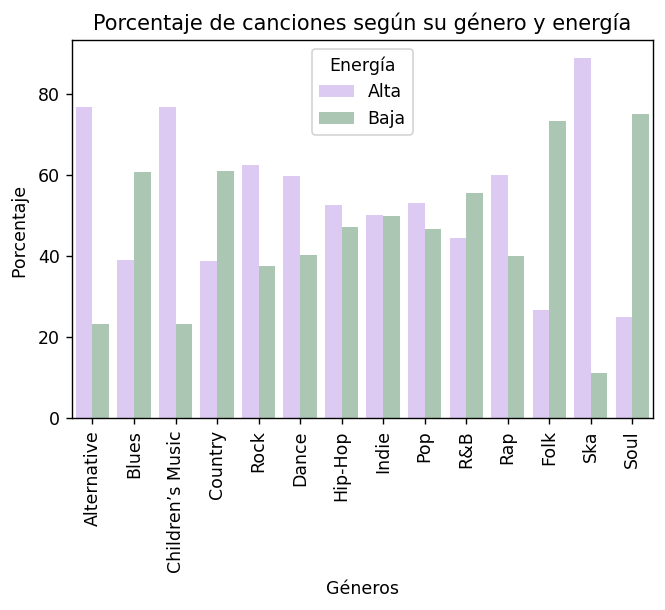

In [ ]:
plt.figure(dpi=125)
my_order = ['Alternative', 'Blues',"Children’s Music",'Country','Rock','Dance','Hip-Hop', 'Indie','Pop','R&B', 'Rap', 'Folk','Ska','Soul']
sns.barplot(x = 'genre', y = 'cant_canciones', hue = 'energy_mean', data = df4, palette=["#ddc3fa", "#A7CAB1"], order = my_order)
plt.legend(title='Energía', loc='upper center')
plt.xticks(rotation=90)
plt.ylabel("Porcentaje ")
plt.xlabel("Géneros")
plt.title("Porcentaje de canciones según su género y energía")
plt.show()